# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `DataSet/loan_data.csv`. Si abren el archivo verán que al principio (en las líneas que empiezan con `#`) se describe el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from utils import plot_confusion_matrix

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de *pandas*). Estos serán los que se trabajarán en el resto del laboratorio.

In [3]:
dataset = pd.read_csv('DataSet/loan_data.csv', comment='#')

# División entre instancias y etiquetas
X, y = dataset.drop('TARGET', axis=1), dataset.TARGET

# División entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina usted que son los más determinantes para la predicción?

**No hace falta escribir código para responder estas preguntas.**

**Respuesta**

1. Automatizar el proceso para otorgar prestamos hipotecarios.
   Se utilizan los datos de aplicaciones para créditos recientes que han sido otorgados, ...
   The consumer credit department of a bank wants to automate the decisionmaking process for approval of home equity lines of credit. To do this, they will follow the recommendations of the Equal Credit Opportunity Act to create an empirically derived and statistically sound credit scoring model. The model will be based on data collected from recent applicants granted credit through the current process of loan underwriting. The model will be built from predictive modeling tools, but the created model must be sufficiently interpretable to provide a reason for any adverse actions (rejections).

2. `TARGET` (1 = client defaulted on loan - 0 = loan repaid). 0 - Se completó el pago, 1 - No se terminó de pagar la deuda.

3. `LOAN`    Amount of the loan request. Monto solicitado para préstamo.
   `MORTDUE` Amount due on existing mortgage. Importe adeudado en la hipoteca.
   `VALUE`   Value of current property. Valor de la propiedad actual.
   `YOJ`     Years at present job. Antigüedad en el trabajo actual.
   `DEROG`   Number of major derogatory reports. Cantidad reportes desfavorables.
   `DELINQ`  Number of delinquent credit lines. Cantidad de líneas de crédito morosas 
   `CLAGE`   Age of oldest trade line in months. Antigüedad de la línea comercial más antigua en meses.
   `NINQ`    Number of recent credit lines. Cantidad de líneas de crédito recientes.
   `CLNO`    Number of credit lines. Cantidad de líneas de crédito.
   `DEBTINC` Debt-to-income ratio. Tasa deuda-ingreso.

4. `LOAN`, `DELINQ`, `DEBTINC`, `VALUE`, `DEROG`.

**Breve estudio del DataSet**

In [4]:
# Dimensiones del DataSet
dataset.shape

(1854, 11)

In [5]:
# Columnas del DataSet
dataset.columns

Index(['TARGET', 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE',
       'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

In [6]:
# Muestra del DataSet
dataset.sample(5, random_state=123)

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
809,0,50400,43635.0,104114.0,10.0,0.0,0.0,224.482939,3.0,35.0,40.851444
12,0,20900,71972.0,101745.0,6.0,0.0,0.0,67.324562,6.0,23.0,38.513256
1799,1,25900,42105.0,73249.0,2.0,0.0,0.0,109.211156,3.0,22.0,31.809086
1195,0,18300,73510.0,95132.0,0.0,0.0,0.0,86.684296,0.0,17.0,25.244046
1064,0,12000,36072.0,62960.0,8.0,0.0,0.0,288.529873,0.0,16.0,22.423002


In [7]:
# Valores Estadísticos del DataSet
dataset.describe()

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000
mean,0.166667,19111.758360,76316.051780,107321.088457,8.900216,0.187702,0.319849,180.300783,1.128910,21.857066,34.573408
std,0.372779,11000.345961,46227.026585,56039.685066,7.552677,0.704882,0.928452,84.838308,1.664555,9.510840,9.308794
min,0.000000,1700.000000,5627.000000,21144.000000,0.000000,0.000000,0.000000,0.486711,0.000000,0.000000,0.838118
25%,0.000000,12000.000000,48984.750000,70787.250000,3.000000,0.000000,0.000000,116.970718,0.000000,16.000000,29.427210
50%,0.000000,17000.000000,67201.000000,94198.000000,7.000000,0.000000,0.000000,174.967815,1.000000,21.000000,35.363407
75%,0.000000,23900.000000,93731.500000,122976.250000,13.000000,0.000000,0.000000,232.261800,2.000000,27.000000,39.357987
max,1.000000,89800.000000,399412.000000,512650.000000,41.000000,10.000000,10.000000,1168.233561,13.000000,65.000000,144.189001


## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase `SGDClassifier` de *scikit-learn*.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_matrix = scaler.fit_transform(X)

X_scaled = pd.DataFrame(data=scaled_matrix, columns=X.columns)

#X_scaled.describe()

# División entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador `SGDClassifier` usando los valores por omisión de *scikit-learn* para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- Matriz de Confusión

In [9]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier(random_state=0)

model.fit(X_train, y_train)

SGDClassifier(random_state=0)

In [10]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [11]:
print(classification_report(y_train, y_train_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1232
           1       0.78      0.35      0.48       251

    accuracy                           0.87      1483
   macro avg       0.83      0.66      0.70      1483
weighted avg       0.86      0.87      0.85      1483



In [12]:
# Matriz de Confusión
# 0:0 TN | 0:1 FP | 1:0 FN | 1:1 TP
# Si el cliente paga, se toma como un negativo.
cm = confusion_matrix(y_train, y_train_pred)

cm

array([[1207,   25],
       [ 164,   87]])

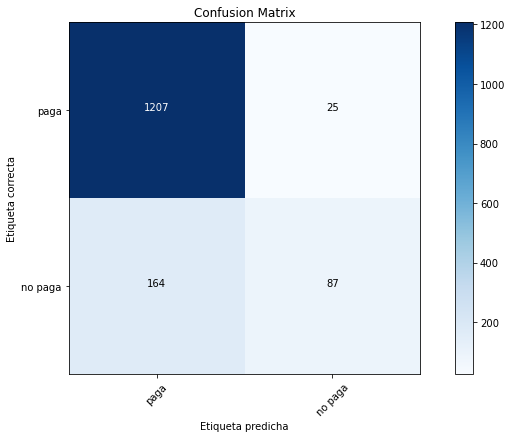

In [13]:
fig = plt.figure(figsize=(10, 6))

plot_confusion_matrix(cm, ['paga', 'no paga'])

In [14]:
print(classification_report(y_test, y_test_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       313
           1       0.74      0.34      0.47        58

    accuracy                           0.88       371
   macro avg       0.82      0.66      0.70       371
weighted avg       0.87      0.88      0.86       371



In [15]:
# Matriz de Confusión
# 0:0 TN | 0:1 FP | 1:0 FN | 1:1 TP
# Si el cliente paga, se toma como un negativo.
cm = confusion_matrix(y_test, y_test_pred)

cm

array([[306,   7],
       [ 38,  20]])

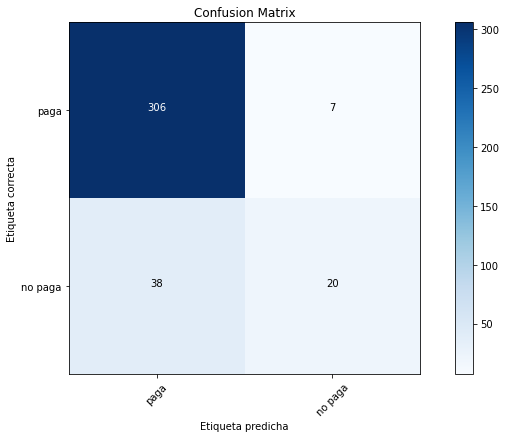

In [16]:
fig = plt.figure(figsize=(10, 6))

plot_confusion_matrix(cm, ['paga', 'no paga'])

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del `SGDClassifier`. Como mínimo, probar diferentes funciones de pérdida (`loss`), tasas de entrenamiento (`alpha`), y tasas de regularización (`penalty`).

Para ello, usar *grid-search* y *5-fold cross-validation* sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar *accuracy* promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- Matriz de Confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [17]:
param_grid = {
    'loss': ['hinge', 'perceptron', 'log', 'squared_epsilon_insensitive'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'penalty': ['l2', 'l1', 'elasticnet'],
}

In [18]:
from sklearn.model_selection import GridSearchCV

model = SGDClassifier(max_iter=10000, random_state=0)

cv = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)
cv.fit(X_train, y_train);

/home/mgobbi289/miniconda3/envs/diplodatos-introaa/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/mgobbi289/miniconda3/envs/diplodatos-introaa/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/mgobbi289/miniconda3/envs/diplodatos-introaa/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/mgobbi289/miniconda3/envs/diplodatos-introaa/l

El warning `ConvergenceWarning: Maximum number of iteration reached before convergence.` se produce al no converger en una cantidad máxima de pasos de aprendizaje. Es decir, el algoritmo finaliza por una cantidad máxima de pasos y no por encontrar un mínimo local.

In [19]:
import pandas as pd

# Obtenemos los resultados de la VC sobre la Grilla de Parámetros.
results = cv.cv_results_

cols = [
    'param_loss',
    'param_alpha',
    'param_penalty',
    'mean_test_score',
    'std_test_score',
    'rank_test_score'
]

df = pd.DataFrame(results, columns=cols)

df

,param_loss,param_alpha,param_penalty,mean_test_score,std_test_score,rank_test_score
0,hinge,0.0001,l2,0.868514,0.008732,2
1,hinge,0.0001,l1,0.869190,0.014962,1
2,hinge,0.0001,elasticnet,0.865809,0.006613,4
3,perceptron,0.0001,l2,0.717188,0.272492,49
4,perceptron,0.0001,l1,0.861778,0.012507,8
5,perceptron,0.0001,elasticnet,0.632050,0.283379,55
6,log,0.0001,l2,0.861766,0.012620,9
7,log,0.0001,l1,0.863798,0.014815,6
8,log,0.0001,elasticnet,0.861091,0.013406,11
9,squared_epsilon_insensitive,0.0001,l2,0.858404,0.010119,14


In [20]:
best_model = cv.best_estimator_

cv.best_params_

{'alpha': 0.0001, 'loss': 'hinge', 'penalty': 'l1'}

In [21]:
best_model.fit(X_train, y_train)

SGDClassifier(max_iter=10000, penalty='l1', random_state=0)

In [22]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

In [23]:
print(classification_report(y_train, y_train_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1232
           1       0.81      0.31      0.45       251

    accuracy                           0.87      1483
   macro avg       0.85      0.65      0.69      1483
weighted avg       0.87      0.87      0.85      1483



In [24]:
# Matriz de Confusión
# 0:0 TN | 0:1 FP | 1:0 FN | 1:1 TP
# Si el cliente paga, se toma como un negativo.
cm = confusion_matrix(y_train, y_train_pred)

cm

array([[1214,   18],
       [ 172,   79]])

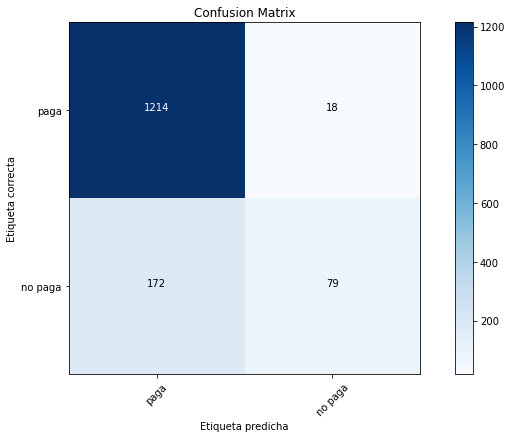

In [25]:
fig = plt.figure(figsize=(10, 6))

plot_confusion_matrix(cm, ['paga', 'no paga'])

In [26]:
print(classification_report(y_test, y_test_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       313
           1       0.81      0.29      0.43        58

    accuracy                           0.88       371
   macro avg       0.85      0.64      0.68       371
weighted avg       0.87      0.88      0.85       371



In [27]:
# Matriz de Confusión
# 0:0 TN | 0:1 FP | 1:0 FN | 1:1 TP
# Si el cliente paga, se toma como un negativo.
cm = confusion_matrix(y_test, y_test_pred)

cm

array([[309,   4],
       [ 41,  17]])

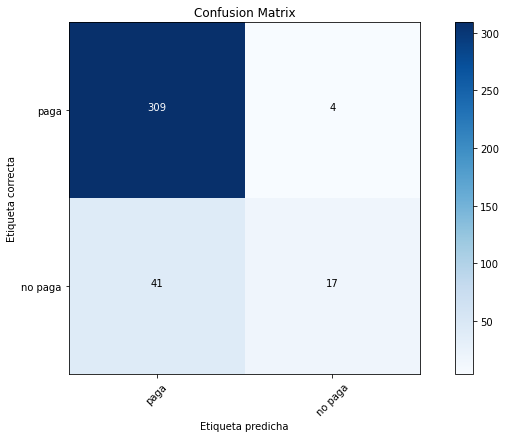

In [28]:
fig = plt.figure(figsize=(10, 6))

plot_confusion_matrix(cm, ['paga', 'no paga'])

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase `DecisionTreeClassifier` de *scikit-learn*.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

In [29]:
# División entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador `DecisionTreeClassifier` usando los valores por omisión de *scikit-learn* para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- Matriz de Confusión

In [30]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0)

model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [31]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [32]:
print(classification_report(y_train, y_train_pred, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1232
           1       1.00      1.00      1.00       251

    accuracy                           1.00      1483
   macro avg       1.00      1.00      1.00      1483
weighted avg       1.00      1.00      1.00      1483



In [33]:
# Matriz de Confusión
# 0:0 TN | 0:1 FP | 1:0 FN | 1:1 TP
# Si el cliente paga, se toma como un negativo.
cm = confusion_matrix(y_train, y_train_pred)

cm

array([[1232,    0],
       [   0,  251]])

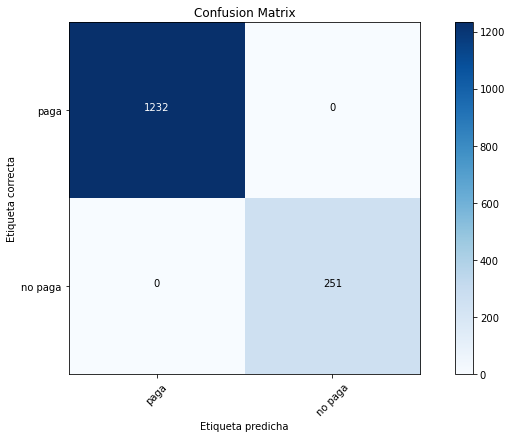

In [34]:
fig = plt.figure(figsize=(10, 6))

plot_confusion_matrix(cm, ['paga', 'no paga'])

In [35]:
print(classification_report(y_test, y_test_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       313
           1       0.62      0.64      0.63        58

    accuracy                           0.88       371
   macro avg       0.77      0.78      0.78       371
weighted avg       0.88      0.88      0.88       371



In [36]:
# Matriz de Confusión
# 0:0 TN | 0:1 FP | 1:0 FN | 1:1 TP
# Si el cliente paga, se toma como un negativo.
cm = confusion_matrix(y_test, y_test_pred)

cm

array([[290,  23],
       [ 21,  37]])

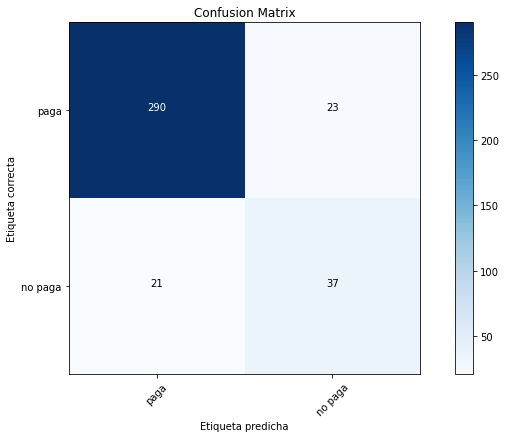

In [37]:
fig = plt.figure(figsize=(10, 6))

plot_confusion_matrix(cm, ['paga', 'no paga'])

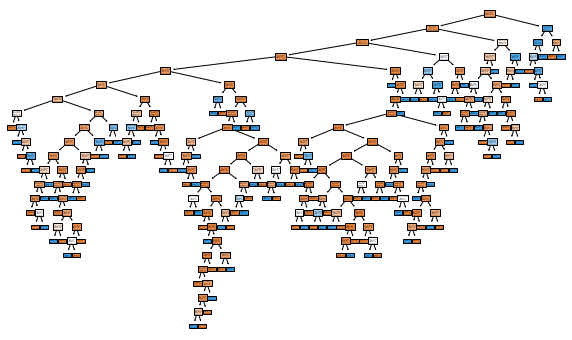

In [38]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(10, 6))

plot_tree(model, filled=True);

In [39]:
#model.tree_
model.get_depth()

22

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del `DecisionTreeClassifier`. Como mínimo, probar diferentes criterios de partición (`criterion`), profundidad máxima del árbol (`max_depth`), y cantidad mínima de samples por hoja (`min_samples_leaf`).

Para ello, usar *grid-search* y *5-fold cross-validation* sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar *accuracy* promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- Matriz de Confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [40]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 5, 10, 20, None],
    'min_samples_leaf': [1, 2, 3, 4, 5, 10],
}

In [41]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(random_state=0)

cv = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)
cv.fit(X_train, y_train);

In [42]:
import pandas as pd

# Obtenemos los resultados de la VC sobre la Grilla de Parámetros.
results = cv.cv_results_

cols = [
    'param_criterion',
    'param_max_depth',
    'param_min_samples_leaf',
    'mean_test_score',
    'std_test_score',
    'rank_test_score'
]

df = pd.DataFrame(results, columns=cols)

df

,param_criterion,param_max_depth,param_min_samples_leaf,mean_test_score,std_test_score,rank_test_score
0,gini,1,1,0.869194,0.009254,29
1,gini,1,2,0.869194,0.009254,29
2,gini,1,3,0.869194,0.009254,29
3,gini,1,4,0.869194,0.009254,29
4,gini,1,5,0.869194,0.009254,29
5,gini,1,10,0.869194,0.009254,29
6,gini,5,1,0.874584,0.014342,16
7,gini,5,2,0.874584,0.014342,16
8,gini,5,3,0.874586,0.015238,15
9,gini,5,4,0.873239,0.015548,19


In [43]:
best_model = cv.best_estimator_

cv.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2}

In [44]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, random_state=0)

In [45]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

In [46]:
print(classification_report(y_train, y_train_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1232
           1       0.99      0.71      0.83       251

    accuracy                           0.95      1483
   macro avg       0.97      0.86      0.90      1483
weighted avg       0.95      0.95      0.95      1483



In [47]:
# Matriz de Confusión
# 0:0 TN | 0:1 FP | 1:0 FN | 1:1 TP
# Si el cliente paga, se toma como un negativo.
cm = confusion_matrix(y_train, y_train_pred)

cm

array([[1230,    2],
       [  72,  179]])

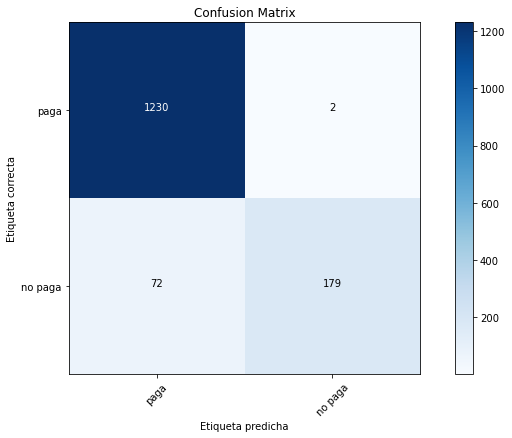

In [48]:
fig = plt.figure(figsize=(10, 6))

plot_confusion_matrix(cm, ['paga', 'no paga'])

In [49]:
print(classification_report(y_test, y_test_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       313
           1       0.75      0.52      0.61        58

    accuracy                           0.90       371
   macro avg       0.83      0.74      0.78       371
weighted avg       0.89      0.90      0.89       371



In [50]:
# Matriz de Confusión
# 0:0 TN | 0:1 FP | 1:0 FN | 1:1 TP
# Si el cliente paga, se toma como un negativo.
cm = confusion_matrix(y_test, y_test_pred)

cm

array([[303,  10],
       [ 28,  30]])

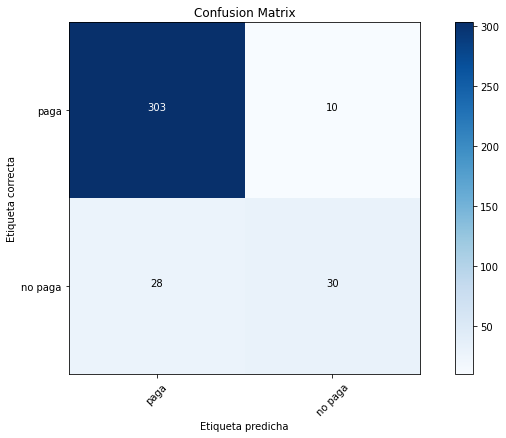

In [51]:
fig = plt.figure(figsize=(10, 6))

plot_confusion_matrix(cm, ['paga', 'no paga'])

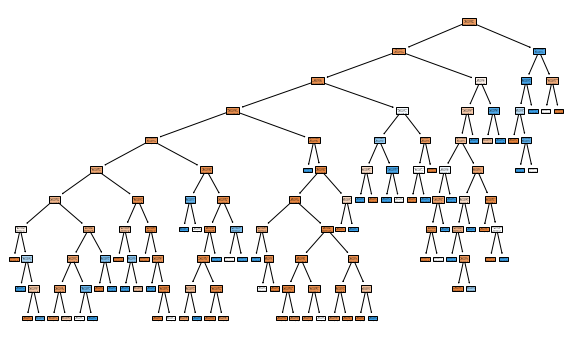

In [52]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(10, 6))

plot_tree(best_model, filled=True);